In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


In [2]:
train = pd.read_csv('D:/HW/MLPS/MLPS_project/train_users_2.csv/train_users_2.csv')
test = pd.read_csv('D:/HW/MLPS/MLPS_project/test_users.csv/test_users.csv')
age_bckt = pd.read_csv('D:/HW/MLPS/MLPS_project/age_gender_bkts.csv/age_gender_bkts.csv')
sessions = pd.read_csv('D:/HW/MLPS/sessions.csv/sessions.csv')
#train = pd.read_csv('project/train_users_2.csv')
#test = pd.read_csv('project/test_users.csv')
#sessions = pd.read_csv('project/sessions.csv')
countries= pd.read_csv('D:/HW/MLPS/MLPS_project/countries.csv/countries.csv')
# train = train.dropna()
# test = test.dropna()

In [3]:
from datetime import datetime 
current_year = datetime.now().year
val = train.age.values
train['age'] = np.where(np.logical_and(val>1920, val<2008), current_year-val, val)
train['age'] = np.where(np.logical_or(val<10, val>100), np.nan, val)

C:\Users\Karuna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
C:\Users\Karuna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
C:\Users\Karuna\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
C:\Users\Karuna\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


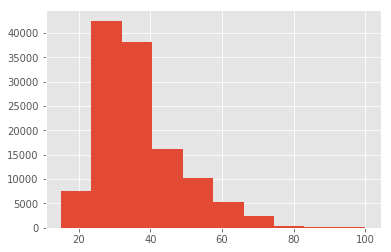

In [4]:
train.age.hist(bins=10)

In [5]:
gender_val = train.gender.values
train['gender'] = np.where(gender_val=='-unknown-', 'OTHER', gender_val)

In [6]:
# plt.hist(list(train['gender']))

In [7]:
train['gender'].describe()

count     213451
unique         3
top        OTHER
freq       95970
Name: gender, dtype: object

In [8]:
browser_type = train.first_browser
train.first_browser = np.where(browser_type=='-unknown-', 'OTHER', browser_type)

In [9]:
from collections import Counter
dict1 = Counter(train.signup_method)

Counter({'basic': 152897, 'facebook': 60008, 'google': 546})


([<matplotlib.axis.XTick at 0x1e600120ba8>,
 <a list of 3 Text xticklabel objects>)

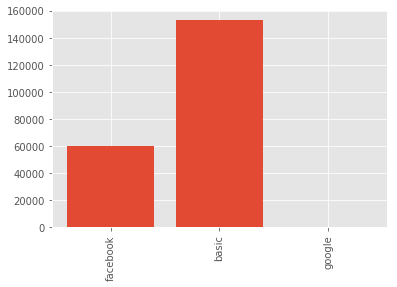

In [10]:
y=list(dict1.values())
x=list(dict1.keys())
print(dict1)
plt.bar(range(len(x)), y, align='center')
plt.xticks(range(len(x)), x, rotation=90)

In [11]:
train.first_affiliate_tracked.value_counts()
train.first_affiliate_tracked.fillna('untracked',inplace=True)
train.first_affiliate_tracked.value_counts()

untracked        115297
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

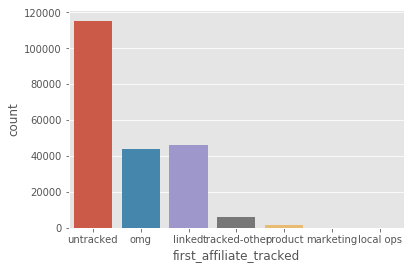

In [12]:
import seaborn as sns
sns.countplot(train.first_affiliate_tracked)
train['age'].fillna(-1, inplace=True)

In [13]:
train.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                             0
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked         0
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [14]:
sessions["action_type"].value_counts()

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [15]:
train.country_destination.value_counts(dropna=False)

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

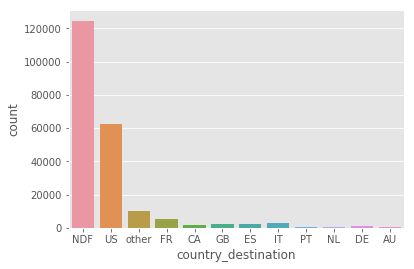

In [16]:
sns.countplot(train.country_destination)

In [17]:
sessions.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [18]:
nan_vals = sessions.loc[sessions['action'].isnull(), :]
nan_vals["action_type"].value_counts()
nan_vals["action_detail"].value_counts()

message_post    79626
Name: action_detail, dtype: int64

In [19]:
sessions.action_type.value_counts()
sessions.action_type.fillna('-unknown-',inplace=True)
sessions.action_type.value_counts()

view                3560902
-unknown-           2157374
data                2103770
click               1996183
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [20]:
sessions.action_detail.value_counts()
sessions.action_detail.fillna('-unknown-',inplace=True)
sessions.action_detail.value_counts().head()

-unknown-                  2157345
view_search_results        1776885
p3                         1376550
wishlist_content_update     706824
user_profile                656839
Name: action_detail, dtype: int64

In [21]:
sessions.isnull().sum()

user_id           34496
action            79626
action_type           0
action_detail         0
device_type           0
secs_elapsed     136031
dtype: int64

In [22]:
sessions.secs_elapsed.fillna(0,inplace=True)
sessions['action'].fillna('unknown', inplace=True)

In [23]:
sessions.dropna(subset=['user_id'],inplace=True)

In [24]:
sessions.isnull().sum()

user_id          0
action           0
action_type      0
action_detail    0
device_type      0
secs_elapsed     0
dtype: int64

In [25]:
##Data Cleaning of session file and train file done.
##todo: Merging of session file
##tdo EDA

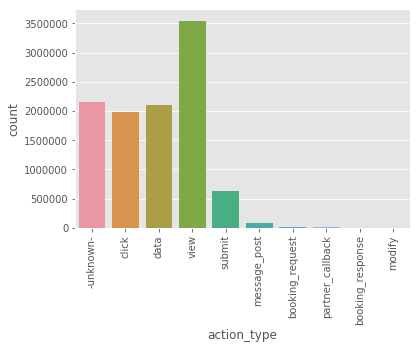

In [26]:
sns.countplot(sessions.action_type);
plt.xticks(rotation=90)
sns.despine()

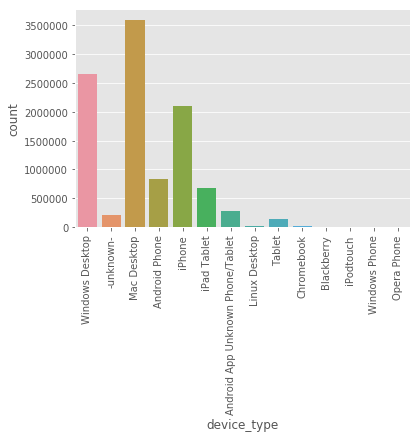

In [27]:
sns.countplot(sessions.device_type)
plt.xticks(rotation = 90)
sns.despine()

In [28]:
age_val = age_bckt.age_bucket.values

age_val = np.array(age_val)

age_bckt['age_bucket'] = np.where(np.logical_or(age_val=='0-4', age_val=='5-9'), np.nan, age_val)
age_val = age_bckt.age_bucket.values

age_bckt['age_bucket'] = np.where(age_val=='100+', np.nan, age_val)

In [29]:
import math
bckt = []
for i in range(len(train)):
    if(train.age.values[i]!=-1):
        if(int(train.age.values[i]/5) == 1):
            bckt.append('5-9')
        elif(int(train.age.values[i]/5) == 2):
            bckt.append('10-14')
        elif(int(train.age.values[i]/5) == 3):
            bckt.append('15-19')
        elif(int(train.age.values[i]/5) == 4):
            bckt.append('20-24')
        elif(int(train.age.values[i]/5) == 5):
            bckt.append('25-29')
        elif(int(train.age.values[i]/5) == 6):
            bckt.append('30-34')
        elif(int(train.age.values[i]/5) == 7):
            bckt.append('35-39')
        elif(int(train.age.values[i]/5) == 8):
            bckt.append('40-44')
        elif(int(train.age.values[i]/5) == 9):
            bckt.append('45-49')
        elif(int(train.age.values[i]/5) == 10):
            bckt.append('50-54')
        elif(int(train.age.values[i]/5) == 11):
            bckt.append('55-59')
        elif(int(train.age.values[i]/5) == 12):
            bckt.append('60-64')
        elif(int(train.age.values[i]/5) == 13):
            bckt.append('65-69')
        elif(int(train.age.values[i]/5) == 14):
            bckt.append('70-74')
        elif(int(train.age.values[i]/5) == 15):
            bckt.append('75-79')
        elif(int(train.age.values[i]/5) == 16):
            bckt.append('80-84')
        elif(int(train.age.values[i]/5) == 17):
            bckt.append('85-89')
        elif(int(train.age.values[i]/5) == 18):
            bckt.append('90-94')
        elif(int(train.age.values[i]/5) == 19):
            bckt.append('95-99')
        else:
            bckt.append('-1')
    else:
        bckt.append('-1')
train['age_bucket'] = bckt

In [30]:
age_bckt['gender']=age_bckt['gender'].str.upper()
train = pd.merge(train, age_bckt, how="left", left_on=["age_bucket","country_destination","gender"],
                  right_on=["age_bucket","country_destination","gender"])

In [32]:
train['date_first_booking'].fillna(-1.0, inplace=True)

In [33]:
col = train.timestamp_first_active
year= [int(str(col[i])[:4]) for i in range(len(col))]
month= [int(str(col[i])[4:6]) for i in range(len(col))]
date = [int(str(col[i])[6:8]) for i in range(len(col))]
hour = [int(str(col[i])[8:10]) for i in range(len(col))]
minn = [int(str(col[i])[10:12]) for i in range(len(col))]
secs = [int(str(col[i])[12:]) for i in range(len(col))]

In [34]:
account_created = train.date_account_created
year_created = [int(str(account_created[i])[:4]) for i in range(len(account_created))]
month_created = [int(str(account_created[i])[5:7]) for i in range(len(account_created))]
date_created = [int(str(account_created[i])[8:10]) for i in range(len(account_created))]

In [36]:
import math
booking_year = []
booking_month = []
booking_date = []
first_booking = train.date_first_booking
for i in range(len(first_booking)):
    if(first_booking[i]!=-1):
        booking_year.append(int(str(first_booking[i])[:4]))
        booking_month.append(int(str(first_booking[i])[5:7]))
        booking_date.append(int(str(first_booking[i])[8:10]))
    else:
        booking_year.append(-1)
        booking_month.append(-1)
        booking_date.append(-1)
booking_year = np.asarray(booking_year)
booking_month = np.asarray(booking_month)
booking_date = np.asarray(booking_date)

In [37]:
train['Account_created_year'] = year_created
train['Account_created_month'] = month_created
train['Account_created_date'] = date_created

train['first_active_year'] = year
train['first_active_month'] = month
train['first_active_date'] = date

train['booking_year'] = booking_year
train['booking_month'] = booking_month
train['booking_date'] = booking_date
#train.drop('timestamp_first_active', axis=1, inplace=True)

#train.drop('date_first_booking', axis=1, inplace=True)



In [38]:
train.head(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,year,Account_created_year,Account_created_month,Account_created_date,first_active_year,first_active_month,first_active_date,booking_year,booking_month,booking_date
0,gxn3p5htnn,2010-06-28,20090319043255,-1,OTHER,-1.0,facebook,0,en,direct,...,NaN,2010,6,28,2009,3,19,-1,-1,-1
1,820tgsjxq7,2011-05-25,20090523174809,-1,MALE,38.0,facebook,0,en,seo,...,NaN,2011,5,25,2009,5,23,-1,-1,-1
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,2015.0,2010,9,28,2009,6,9,2010,8,2
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,NaN,2011,12,5,2009,10,31,2012,9,8
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,OTHER,41.0,basic,0,en,direct,...,NaN,2010,9,14,2009,12,8,2010,2,18
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,OTHER,-1.0,basic,0,en,other,...,NaN,2010,1,1,2010,1,1,2010,1,2
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,...,2015.0,2010,1,2,2010,1,2,2010,1,5
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,...,2015.0,2010,1,3,2010,1,3,2010,1,13
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,...,2015.0,2010,1,4,2010,1,4,2010,7,29
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,OTHER,46.0,basic,0,en,other,...,NaN,2010,1,4,2010,1,4,2010,1,4


In [46]:
dict1={}
dict1['action']='count'                                            
dict1['device_type']='first'
dict1['secs_elapsed']=sum
session_data_group = sessions.groupby('user_id').agg(dict1)
session_data_group

,action,device_type,secs_elapsed
user_id,,,
00023iyk9l,40,Mac Desktop,867896.0
0010k6l0om,63,Mac Desktop,586543.0
001wyh0pz8,90,Android App Unknown Phone/Tablet,282965.0
0028jgx1x1,31,-unknown-,297010.0
002qnbzfs5,789,iPhone,6487080.0
0031awlkjq,8,iPhone,39574.0
0035hobuyj,489,Mac Desktop,5724670.0
00378ocvlh,75,Mac Desktop,1827164.0
00389675gq,177,Windows Desktop,2605711.0


In [47]:
def session_merger(this,that):
    a = sessions.groupby([this,that]).count()['secs_elapsed'].unstack()
    return a
lst=['action','action_type','action_detail']
this='user_id'
mylst=[]
for that in lst:
    mylst.append(session_merger(this,that).fillna(0))
joined = pd.merge(mylst[0],mylst[1],left_index=True,right_index=True,how='inner')
joined2 = pd.merge(joined,mylst[2],left_index=True,right_index=True,how='inner')


In [48]:
joined2

,10,11,12,15,about_us,accept_decline,account,acculynk_bin_check_failed,acculynk_bin_check_success,acculynk_load_pin_pad,...,view_resolutions,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
user_id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0
0010k6l0om,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
001wyh0pz8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0028jgx1x1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002qnbzfs5,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0031awlkjq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0035hobuyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,200.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0
00378ocvlh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
00389675gq,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,14.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0


In [49]:
session_train_merged = pd.merge(train,session_data_group,left_on='id',right_index=True,how='inner')

In [50]:
session_train_merged['booked_room'] = session_train_merged['country_destination']!='NDF'


Text(0,0.5,'Total Secs elapsed')

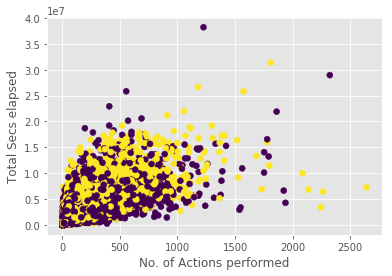

In [51]:
plt.scatter(session_train_merged['action'],session_train_merged['secs_elapsed'],c=session_train_merged['booked_room'])
plt.xlabel("No. of Actions performed")
plt.ylabel("Total Secs elapsed")

In [52]:
s =sum(session_train_merged['booked_room'])
t =len(session_train_merged)
print("Percentage of rooms booked ever approx:",int(s/t*100),"%")

Percentage of rooms booked ever approx: 38 %


In [53]:
categories = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_flow', 
    'signup_method'
]
train=pd.get_dummies(session_train_merged,columns=categories)

In [54]:
df = sessions.groupby(['action','action_type']).count()['user_id']
df.sort_values(ascending=False)

action                       action_type 
show                         view            2081113
search_results               click            723124
personalize                  data             704782
index                        view             677575
show                         -unknown-        677554
search                       click            529424
ajax_refresh_subtotal        click            486414
similar_listings             data             363423
update                       submit           350086
social_connections           data             335577
reviews                      data             317415
active                       -unknown-        187370
similar_listings_v2          -unknown-        168457
lookup                       -unknown-        161422
dashboard                    view             152515
header_userpic               data             141315
index                        -unknown-        128557
collections                  view             122666
edit

In [ ]:
train.timestamp_first_active[0]

In [55]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,age,age_bucket,population_in_thousands,year,Account_created_year,Account_created_month,...,signup_flow_0,signup_flow_8,signup_flow_12,signup_flow_21,signup_flow_23,signup_flow_24,signup_flow_25,signup_method_basic,signup_method_facebook,signup_method_google
137021,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,62.0,60-64,NaN,NaN,2014,1,...,1,0,0,0,0,0,0,1,0,0
137022,yo8nz8bqcq,2014-01-01,20140101001558,-1,-1.0,-1,NaN,NaN,2014,1,...,1,0,0,0,0,0,0,1,0,0
137023,4grx6yxeby,2014-01-01,20140101001639,-1,-1.0,-1,NaN,NaN,2014,1,...,1,0,0,0,0,0,0,1,0,0
137024,ncf87guaf0,2014-01-01,20140101002146,-1,-1.0,-1,NaN,NaN,2014,1,...,1,0,0,0,0,0,0,1,0,0
137025,4rvqpxoh3h,2014-01-01,20140101002619,2014-01-02,-1.0,-1,NaN,NaN,2014,1,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
#Number of days between account creation and first active
from datetime import datetime
train['date_timestamp_first_active'] = [ datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in train['timestamp_first_active'].astype(str)]
train['diff'] = train['date_account_created'] - train['date_timestamp_first_active']